# Eye gaze

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('./DataLoader')

from DataLoader.Dataset import Dataset
import helpers
from helpers import imshow

## Creation of a Dataset container

In [2]:
DATASET_PATH= './Data'
dp = Dataset(path=DATASET_PATH)[0]

## Gaze visualization

World to image function definition

In [3]:
world_to_img = lambda x : helpers.world_to_img(x, dp.intrinsic_matrix, dp.extrinsic_matrix)

Extract the eye center and gaze vector 3D points from the modalities

In [4]:
eye_left_world = dp.apex_of_cornea_point.key_3d.left_eye
eye_right_world = dp.apex_of_cornea_point.key_3d.right_eye
gaze_left_world = dp.eye_gaze.axis_directions.left_eye.axis_directions.optical_axis_direction
gaze_right_world = dp.eye_gaze.axis_directions.right_eye.axis_directions.optical_axis_direction

Projection to image coordinates

In [5]:

arrow_length = 0.02
gaze_left_img = world_to_img(arrow_length * gaze_left_world + eye_left_world)
gaze_right_img = world_to_img(arrow_length * gaze_right_world + eye_right_world)
eye_left_img = world_to_img(eye_left_world)
eye_right_img = world_to_img(eye_right_world)

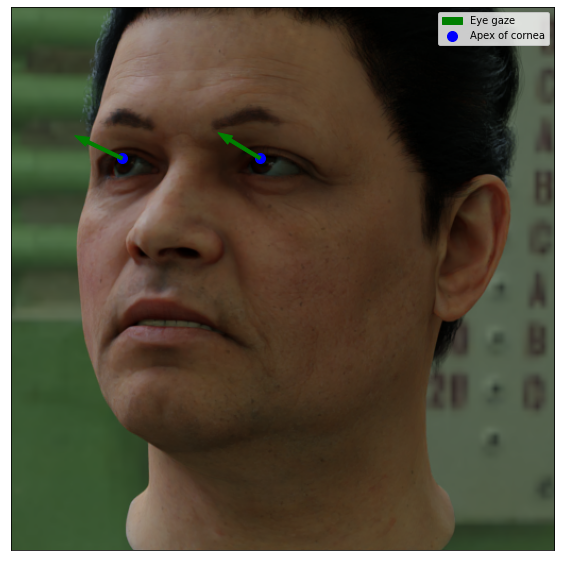

In [7]:
imshow(dp.rgb_img)
plt.scatter(*np.flip(dp.apex_of_cornea_point.key_2d.camera.left_eye), color='b', s=100, label='Apex of cornea')
plt.scatter(*np.flip(dp.apex_of_cornea_point.key_2d.camera.right_eye), color='b', s=100)
plt.arrow(*eye_left_img, *(gaze_left_img - eye_left_img), color='g', label='Eye gaze', width=3)
plt.arrow(*eye_right_img, *(gaze_right_img - eye_right_img), color='g', width=3)
plt.legend()